Goal:
- Average daily
- Average weekly

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pypsa

In [265]:
run = "nresults_full_3H_ws"
prefix = "/mnt/c/Users/scl38887/Documents/git/aldehyde/workflow/subworkflows/pypsa-earth-sec/results/" + run + "/postnetworks/"
output = "/mnt/c/Users/scl38887/Documents/git/aldehyde/results/" + run + "/graphics/rldc/"
#path = "elec_s_10_ec_lc1.0_Co2L0.90_3H_2030_0.15_DF_0export.nc"
#n = pypsa.Network(prefix + path)

In [266]:
def calculate_rldc(n, resample, incl_curtailed):

    # Get load
    load = n.loads_t.p_set[n.loads[n.loads.carrier == "AC"].index].sum(axis=1)

    # Get feed-in of wind 
    wind_power = n.generators.p_nom_opt[n.generators[n.generators.carrier == "onwind"].index]
    wind_profile = n.generators_t.p_max_pu[n.generators[n.generators.carrier == "onwind"].index]
    wind_feed_in = n.generators_t.p[n.generators[n.generators.carrier == "onwind"].index].sum(axis=1)
    wind_feed_in_max = (wind_power * wind_profile).sum(axis=1)    

    # Get feed-in of solar
    solar_power = n.generators.p_nom_opt[n.generators[n.generators.carrier == "solar"].index]
    solar_profile = n.generators_t.p_max_pu[n.generators[n.generators.carrier == "solar"].index]
    solar_feed_in = n.generators_t.p[n.generators[n.generators.carrier == "solar"].index].sum(axis=1)
    solar_feed_in_max = (solar_power * solar_profile).sum(axis=1)

    # Calculate residual load
    if incl_curtailed == True:
        rldc = load - wind_feed_in_max - solar_feed_in_max
    elif incl_curtailed == False:
        rldc = load - wind_feed_in - solar_feed_in

    # Average hourly, daily, weekly
    rldc = rldc.resample(resample).mean().ffill()

    # Sort residual load
    rldc = rldc.sort_values(ascending=False)
    rldc = rldc.reset_index(drop=True)

    return rldc

In [330]:
def calculate_rlc(n, resample, incl_curtailed, time_sorted):

    # Get load
    load = n.loads_t.p_set[n.loads[n.loads.carrier == "AC"].index].sum(axis=1)

    # Get feed-in of wind 
    wind_power = n.generators.p_nom_opt[n.generators[n.generators.carrier == "onwind"].index]
    wind_profile = n.generators_t.p_max_pu[n.generators[n.generators.carrier == "onwind"].index]
    wind_feed_in = n.generators_t.p[n.generators[n.generators.carrier == "onwind"].index].sum(axis=1)
    wind_feed_in_max = (wind_power * wind_profile).sum(axis=1)    

    # Get feed-in of solar
    solar_power = n.generators.p_nom_opt[n.generators[n.generators.carrier == "solar"].index]
    solar_profile = n.generators_t.p_max_pu[n.generators[n.generators.carrier == "solar"].index]
    solar_feed_in = n.generators_t.p[n.generators[n.generators.carrier == "solar"].index].sum(axis=1)
    solar_feed_in_max = (solar_power * solar_profile).sum(axis=1)

    # Calculate residual load
    if incl_curtailed == True:
        rlc = load - wind_feed_in_max - solar_feed_in_max
    elif incl_curtailed == False:
        rlc = load - wind_feed_in - solar_feed_in

    # Average hourly, daily, weekly
    if resample != False:
        rlc = rlc.resample(resample).mean().ffill()

    if time_sorted == True:
        # Sort residual load
        rlc = rlc.sort_values(ascending=False)
        rlc = rlc.reset_index(drop=True)

    return rlc

In [301]:
rlc = calculate_rlc(n, resample="W", incl_curtailed=incl_curtailed)

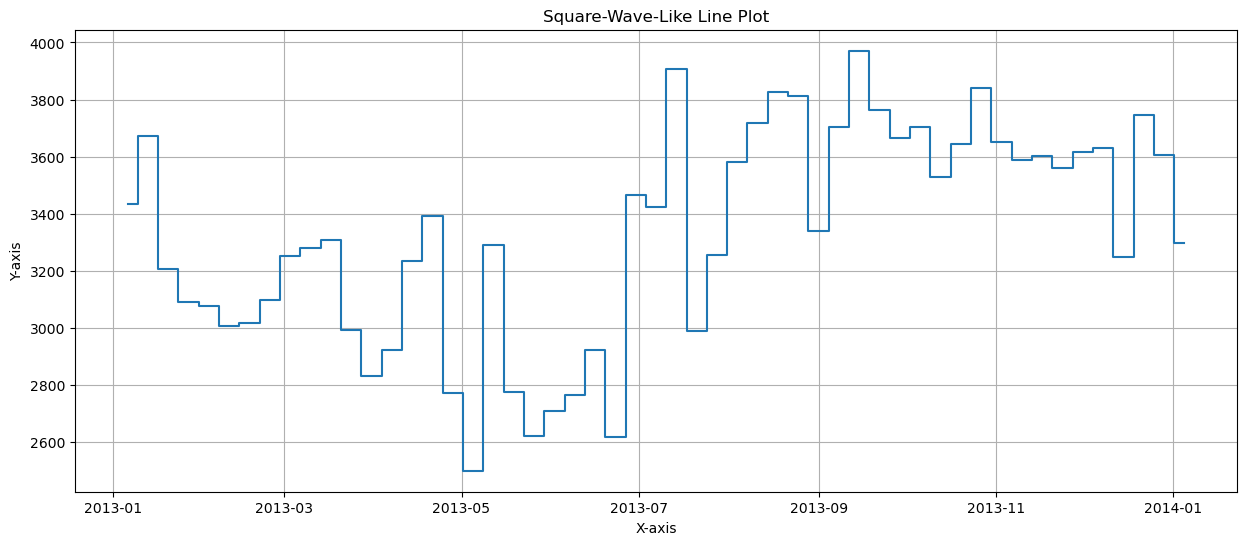

In [319]:
plt.figure(figsize=(15, 6))
plt.step(rlc.index, rlc, where='mid', label='RLDC')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Square-Wave-Like Line Plot')
plt.grid(True)
plt.show()

In [297]:
average_day #.index.hour[:100]

snapshot
0     4689.272953
3     4805.808431
6     5182.820534
9      830.265454
12   -1743.259137
15     942.587714
18    6095.922222
21    5827.306529
dtype: float64

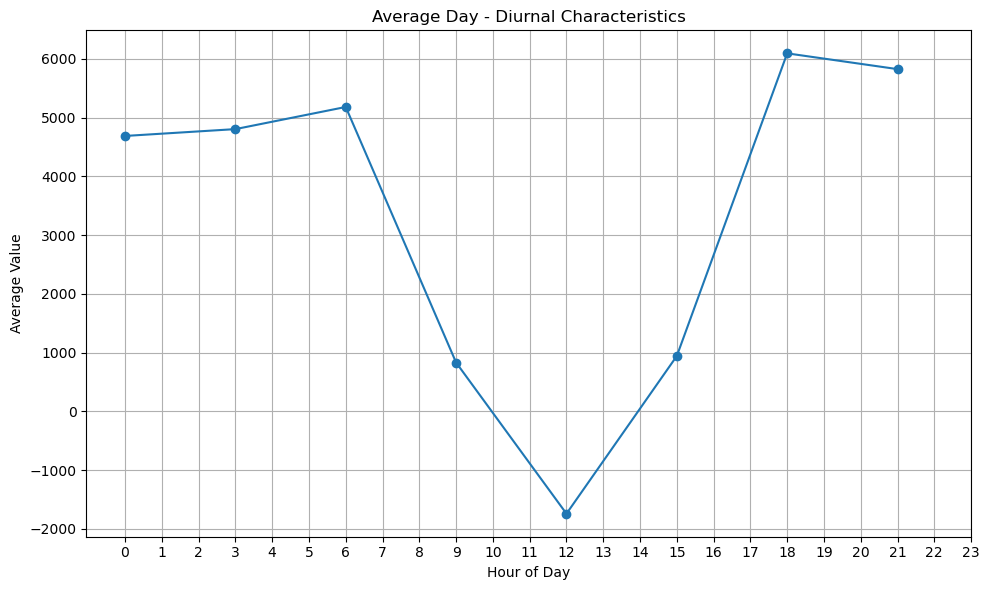

In [296]:
# Group the data by hour and calculate the mean for each hour across the year
average_day = rlc.groupby(rlc.index.hour).mean()

# Plot the average day
plt.figure(figsize=(10, 6))
plt.plot(average_day.index, average_day, marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Average Value')
plt.title('Average Day - Diurnal Characteristics')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

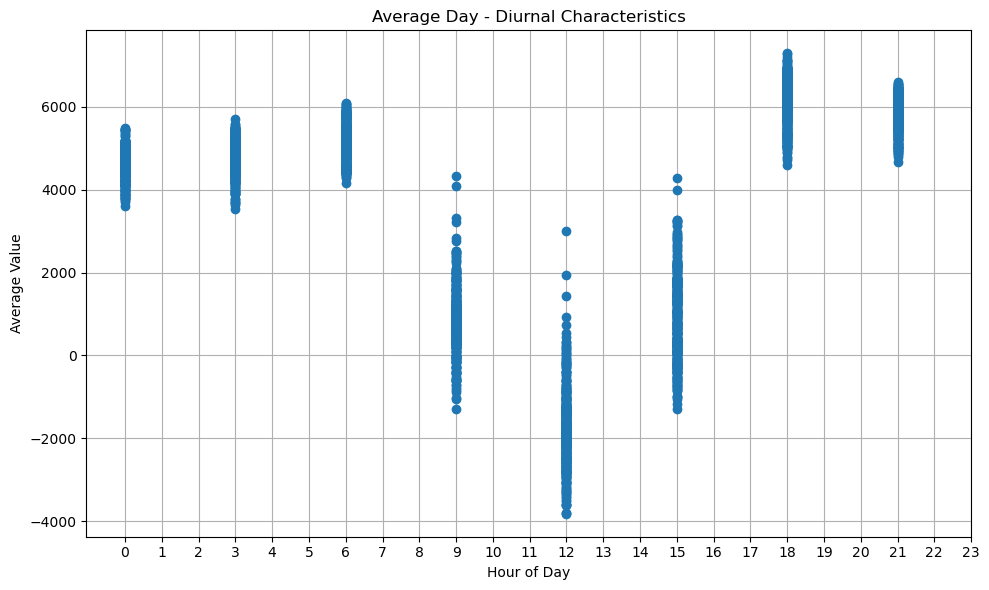

In [293]:
# Resample the data to hourly and calculate the mean for each hour
average_day = rlc.resample('H').mean()

# Plot the average day
plt.figure(figsize=(10, 6))
plt.plot(average_day.index.hour, average_day, marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Average Value')
plt.title('Average Day - Diurnal Characteristics')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


<AxesSubplot:xlabel='snapshot'>

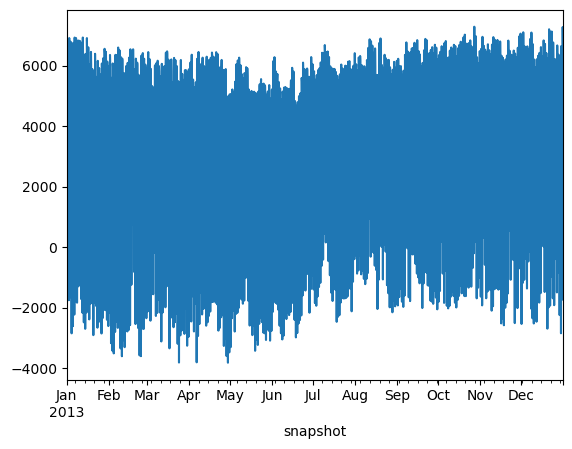

In [286]:
rlc.plot()

In [267]:
def reverse_mitigation(m):
    # if m is bigger than 1, set it to 1
    if m > 1:
        m = 1
    return int(np.round((1 - m)*100, 4))   

In [325]:
rldc = calculate_rlc(n, resample=resampling, incl_curtailed=incl_curtailed, time_sorted=True)

INFO:pypsa.io:Imported network elec_s_10_ec_lc1.0_Co2L2.0_3H_2030_0.15_DF_0export.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_10_ec_lc1.0_Co2L0.50_3H_2030_0.15_DF_0export.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_10_ec_lc1.0_Co2L0.10_3H_2030_0.15_DF_0export.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


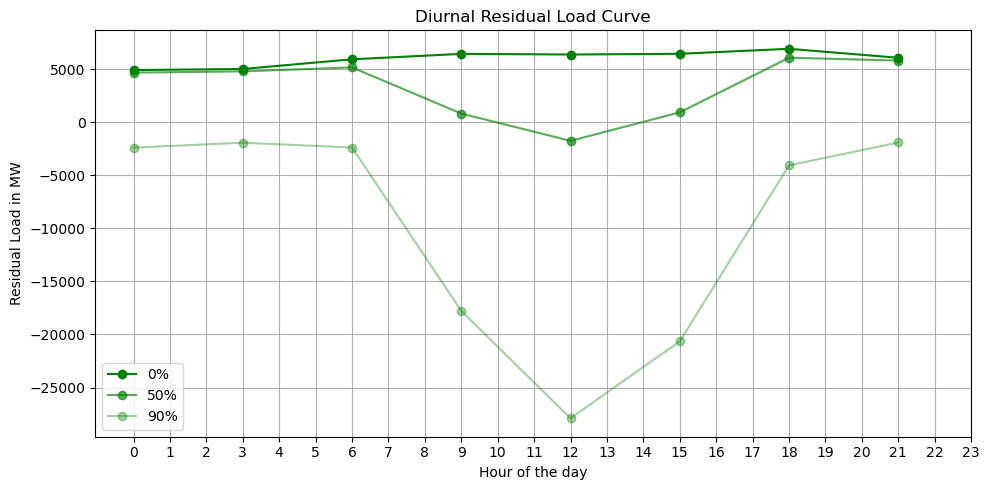

In [332]:
# Group the data by hour and calculate the mean for each hour across the year
#average_day = rlc.groupby(rlc.index.hour).mean()


#resampling = "H"
incl_curtailed = True

#xlabel = {"H": "Hours", "D": "Days", "W": "Weeks"}
mitigation = [2.0, 0.50, 0.10] #[2.0, 0.90, 0.80, 0.70, 0.60, 0.50, 0.40, 0.30, 0.20, 0.10]

fig = plt.figure(figsize=(10, 5))

# Get and plot the data
for m in mitigation:

    m = str(m) + "0" if m < 1 else str(m) 
    path = "elec_s_10_ec_lc1.0_Co2L" + str(m) + "_3H_2030_0.15_DF_0export.nc"
    n = pypsa.Network(prefix + path)
    
    rlc = calculate_rlc(n, resample=False, incl_curtailed=incl_curtailed, time_sorted=False)
    average_day = rlc.groupby(rlc.index.hour).mean()
    #rlc.plot(label=str(reverse_mitigation(eval(m))) + "%", color="green", alpha=1-reverse_mitigation(eval(m))*0.007)

    plt.plot(average_day.index, average_day, marker='o', label=str(reverse_mitigation(eval(m))) + "%", color="green", alpha=1-reverse_mitigation(eval(m))*0.007)


# Add a title
plt.title("Diurnal Residual Load Curve")

# Add axis labels
plt.xlabel('Hour of the day')
plt.ylabel("Residual Load in MW")
plt.xlim(0, 23)
plt.xticks(range(0, 24))
plt.legend(loc="lower left")
plt.grid()

plt.tight_layout()
plt.savefig(output + "rlc_diurnal" + "_inclCurt" + str(incl_curtailed) + ".pdf")
plt.show()

INFO:pypsa.io:Imported network elec_s_10_ec_lc1.0_Co2L0.50_3H_2030_0.15_DF_0export.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


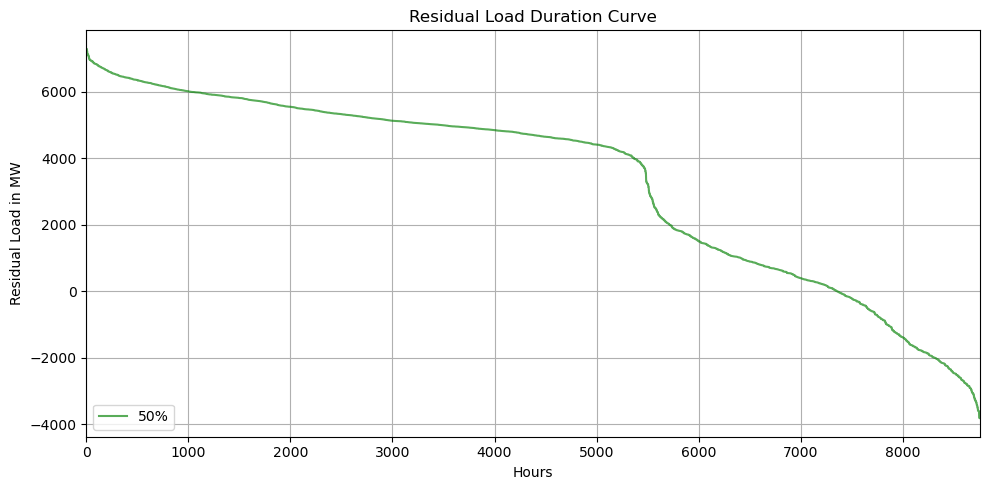

In [ ]:
resampling = "H"
incl_curtailed = True

xlabel = {"H": "Hours", "D": "Days", "W": "Weeks"}
mitigation = [0.5] #[2.0, 0.90, 0.80, 0.70, 0.60, 0.50, 0.40, 0.30, 0.20, 0.10]

fig = plt.figure(figsize=(10, 5))

# Get and plot the data
for m in mitigation:

    m = str(m) + "0" if m < 1 else str(m) 
    path = "elec_s_10_ec_lc1.0_Co2L" + str(m) + "_3H_2030_0.15_DF_0export.nc"
    n = pypsa.Network(prefix + path)
    
    rlc = calculate_rlc(n, resample=resampling, incl_curtailed=incl_curtailed, time_sorted=True)
    rlc.plot(label=str(reverse_mitigation(eval(m))) + "%", color="green", alpha=1-reverse_mitigation(eval(m))*0.007)


# Add a title
plt.title("Residual Load Duration Curve")

# Add axis labels
plt.xlabel(xlabel[resampling])
plt.ylabel("Residual Load in MW")
plt.xlim(0, len(rlc))
plt.legend(loc="lower left")
plt.grid()

plt.tight_layout()
plt.savefig(output + "rlc_sorted_" + xlabel[resampling] + "_inclCurt" + str(incl_curtailed) + ".pdf")
plt.show()

<AxesSubplot:xlabel='snapshot'>

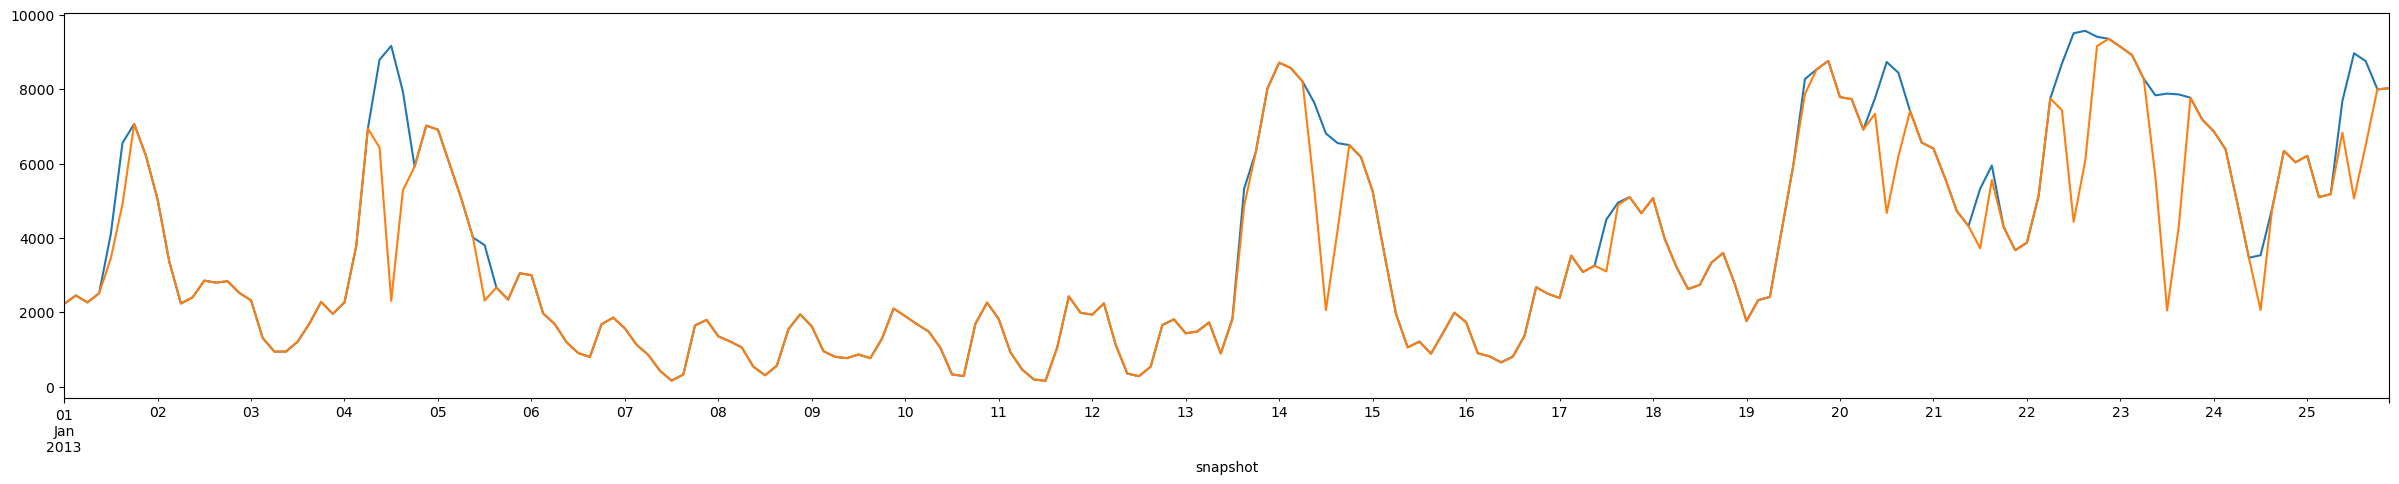

In [47]:
fig = plt.figure(figsize=(30, 5))
#n.generators_t.p[n.generators[n.generators.carrier == "onwind"].index].sum(axis=1).plot() #.sum() / 1e6 * 3
wind_power = n.generators.p_nom_opt[n.generators[n.generators.carrier == "onwind"].index]
wind_profile = n.generators_t.p_max_pu[n.generators[n.generators.carrier == "onwind"].index]
wind_feed_in = n.generators_t.p[n.generators[n.generators.carrier == "onwind"].index].sum(axis=1)
(wind_profile * wind_power).sum(axis=1).plot() #.sum() / 1e6 * 3
wind_feed_in.plot()

